# TIDE COCO Example
This example downloads some Mask R-CNN results files from [detectron](https://github.com/facebookresearch/Detectron/blob/master/MODEL_ZOO.md) and then evaluates them using the COCO dataset.

### Grabbing Mask R-CNN results
For demonstration purposes, we'll be using Mask R-CNN results (Model ID 36229740), but you'll want to use your own results in practice.

In [1]:
# Download the Mask R-CNN results to test on. Only for demonstration purposes.
import urllib.request # For downloading the sample Mask R-CNN annotations

bbox_file = 'mask_rcnn_bbox.json'
mask_file = 'mask_rcnn_mask.json'

urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/detectron/35861795/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_1x.yaml.02_31_37.KqyEK4tT/output/test/coco_2014_minival/generalized_rcnn/bbox_coco_2014_minival_results.json', bbox_file)
urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/detectron/35861795/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_1x.yaml.02_31_37.KqyEK4tT/output/test/coco_2014_minival/generalized_rcnn/segmentations_coco_2014_minival_results.json', mask_file)

print('Results Downloaded!')

Results Downloaded!


### Running TIDE

In [2]:
# Import the TIDE evaluation toolkit
from tidecv import TIDE

# Import the datasets we want to use
import tidecv.datasets as datasets

In [3]:
# Load the dataset
# This will automatically download COCO's 2017 annotations for you. You can specify your own COCO-style dataset too!
# See datasets.py for a list of all the supported datasets.
gt = datasets.COCO()

COCO2017 annotations not found. Downloading...
Successfully downloaded COCO2017 to "/home/bruno/.local/share/tidecv/COCO2017"


In [4]:
# Load the results in COCO format
bbox_results = datasets.COCOResult(bbox_file) # These files were downloaded above.
mask_results = datasets.COCOResult(mask_file) # Replace them with your own in practice.

In [5]:
# Create a TIDE object to use for evaluation
tide = TIDE()

In [6]:
# Run the evaluations on the standard COCO metrics (i.e., a range of AP with IoU thresholds [50:95])
tide.evaluate_range(gt, bbox_results, mode=TIDE.BOX ) # Several options are available here, see the functions
tide.evaluate_range(gt, mask_results, mode=TIDE.MASK) # evaluate and evaluate_range for more details.

In [7]:
# Summarize the evaluations run so far in the console
tide.summarize()

-- mask_rcnn_bbox --

bbox AP @ [50-95]: 40.01
                                         bbox AP @ [50-95]
  Thresh       50       55       60       65       70       75       80       85       90       95  
---------------------------------------------------------------------------------------------------
    AP      61.80    59.76    57.07    53.72    49.59    43.66    35.87    25.77    11.68     1.19  

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     3.40     6.65     1.18     0.19     3.96     7.53  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      16.28      15.57  

-- mask_rcnn_mask --

mask AP @ [50-95]: 35.92
                                         mask AP @ [50-95]
  Thresh       50       55       60       65       70       75       80       85       90       95  
-------------------------------------------

/home/bruno/prog/tcc/env/lib/python3.10/site-packages/tidecv/plotting.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_dfs['main'], x='Delta mAP', y='Error Type', ax=ax,
/home/bruno/prog/tcc/env/lib/python3.10/site-packages/tidecv/plotting.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_dfs['special'], x='Error Type', y='Delta mAP', ax=ax,
/home/bruno/prog/tcc/env/lib/python3.10/site-packages/tidecv/plotting.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['FP', 'FN'])


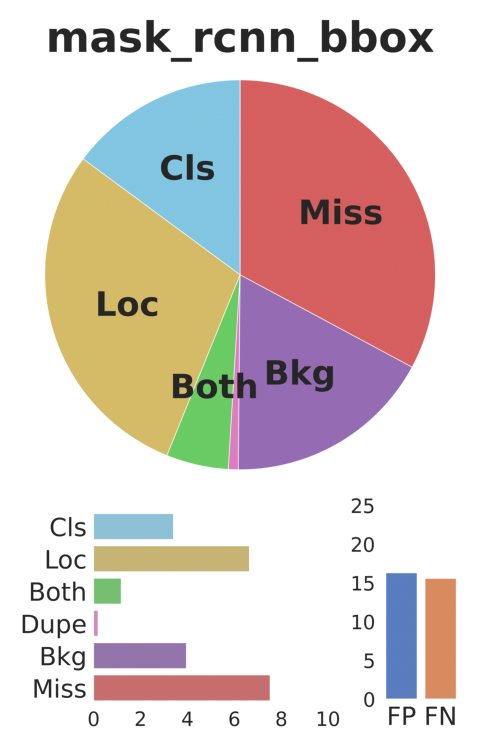

/home/bruno/prog/tcc/env/lib/python3.10/site-packages/tidecv/plotting.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_dfs['main'], x='Delta mAP', y='Error Type', ax=ax,
/home/bruno/prog/tcc/env/lib/python3.10/site-packages/tidecv/plotting.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_dfs['special'], x='Error Type', y='Delta mAP', ax=ax,
/home/bruno/prog/tcc/env/lib/python3.10/site-packages/tidecv/plotting.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['FP', 'FN'])


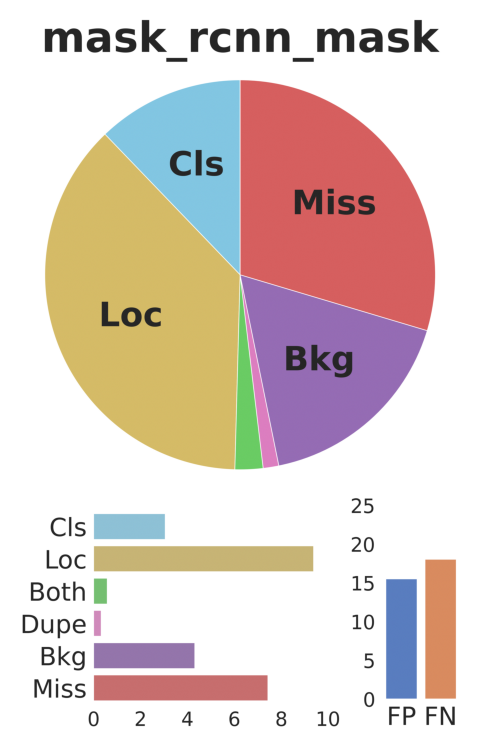

In [8]:
# Plot summaries for the evaluations run so far
tide.plot()